This Dataset is a classification dataset and it is for Vehicle Insurance of a company. It is built based on customers information if the customer will be applying for Vehicle insurance or not. 

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

## Importing Useful Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

XGboostClassifier and LGBMClassifier are used.
If you don't have it, use the code below to install it in your anaconda.

conda install -c conda-forge xgboost

conda install -c conda-forge lightgbm

### Loading the dataset

In [2]:
health_train = pd.read_csv("train.csv")

In [3]:
health_test = pd.read_csv("test.csv")

In [4]:
# checking for the shape(size) of the train set
health_train.shape

(381109, 12)

In [5]:
# checking for the shape(size) of the test set
health_test.shape

(127037, 11)

### Exploring the dataset

In [6]:
# checking if there is any null or empty column in it.
health_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Here we see that there no null or empty column in the dataset.

In [7]:
# checking for null or empty cell or column in the test set
health_test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

Here, it is also evident that there isn't any null cell.


In [8]:
# The train set information
health_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


from the information we see that some columns have inputs that are object, int64 and float64.

In [9]:
# obviously, the test set will have similar result.
health_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


And seeing that there isn't a response column in the test set, signifies that our target is "Response".

Now looking at the datasets"

In [10]:
# Train set Description
health_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
# Test set Description
health_test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [12]:
# Getting the first 10 rows in the train set
health_train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


#### So from here on we see that it is a classification dataset, because the response is between 0 and 1.


In [13]:
# Also the first 10 rows in the test set
health_test.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
5,381115,Male,22,1,30.0,1,< 1 Year,No,40207.0,152.0,266
6,381116,Female,51,1,37.0,1,1-2 Year,No,40118.0,26.0,107
7,381117,Male,25,1,41.0,1,< 1 Year,No,23375.0,152.0,232
8,381118,Male,42,1,41.0,0,1-2 Year,Yes,2630.0,26.0,277
9,381119,Female,37,1,12.0,1,1-2 Year,No,27124.0,124.0,133


In [14]:
# Looking at the number of columns and number of unique values in the dataset

for i in health_train.columns:
    print(f'{i} --> {health_train[i].nunique()}')

id --> 381109
Gender --> 2
Age --> 66
Driving_License --> 2
Region_Code --> 53
Previously_Insured --> 2
Vehicle_Age --> 3
Vehicle_Damage --> 2
Annual_Premium --> 48838
Policy_Sales_Channel --> 155
Vintage --> 290
Response --> 2


### Performing EDA

#### EDA for object column type.

Male      206089
Female    175020
Name: Gender, dtype: int64


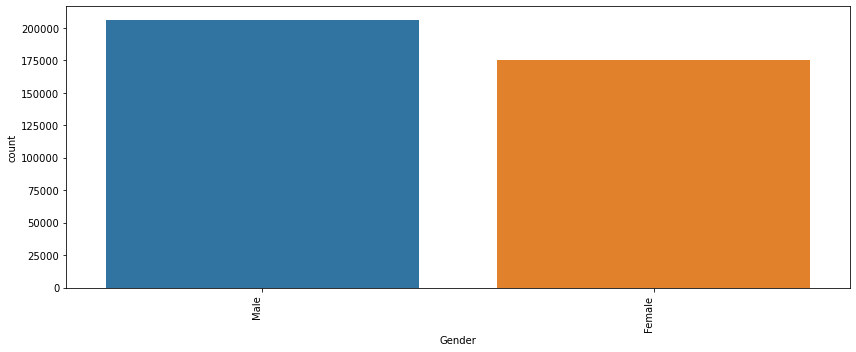

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


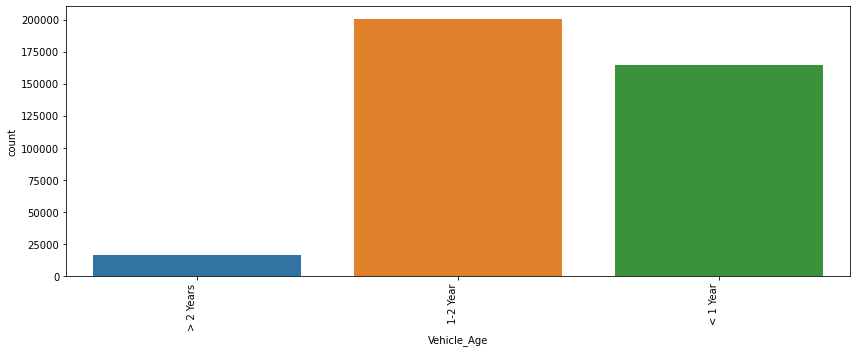

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


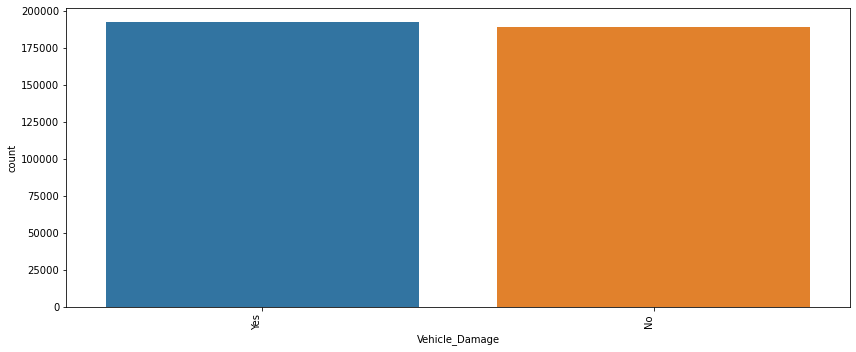

In [15]:
def object_count_plot(health_train):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    
    for var in health_train.columns:
        if health_train[var].dtype == 'object':
            print(health_train[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=health_train)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.savefig('figure.png')
            plt.show()
object_count_plot(health_train)

#### EDA for numeric type columns

count    381109.000000
mean     190555.000000
std      110016.836208
min           1.000000
25%       95278.000000
50%      190555.000000
75%      285832.000000
max      381109.000000
Name: id, dtype: float64


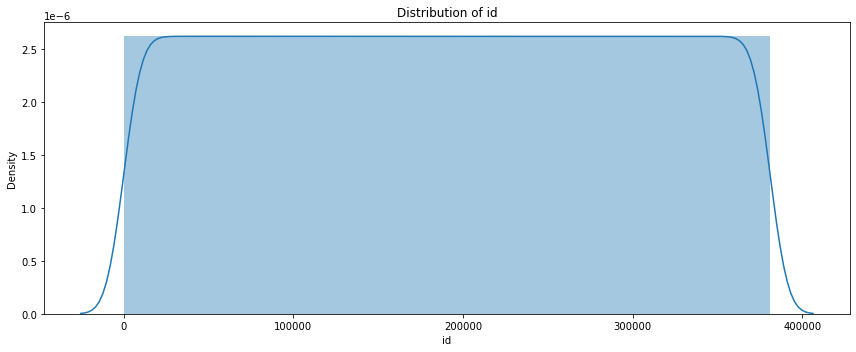

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64


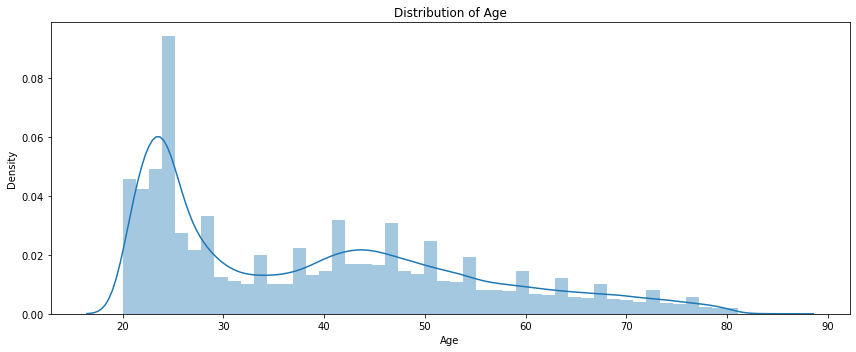

count    381109.000000
mean          0.997869
std           0.046110
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64


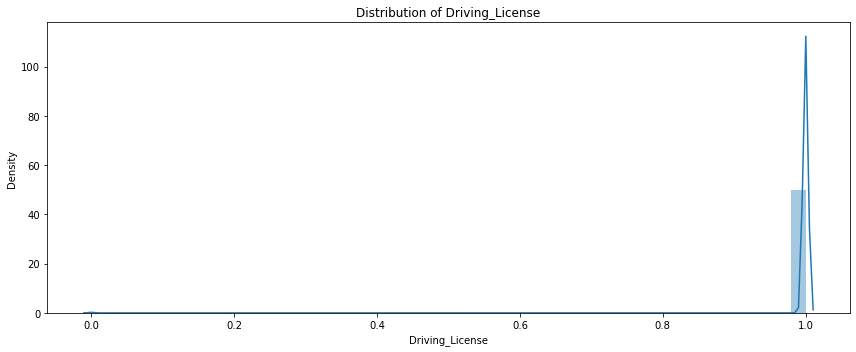

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64


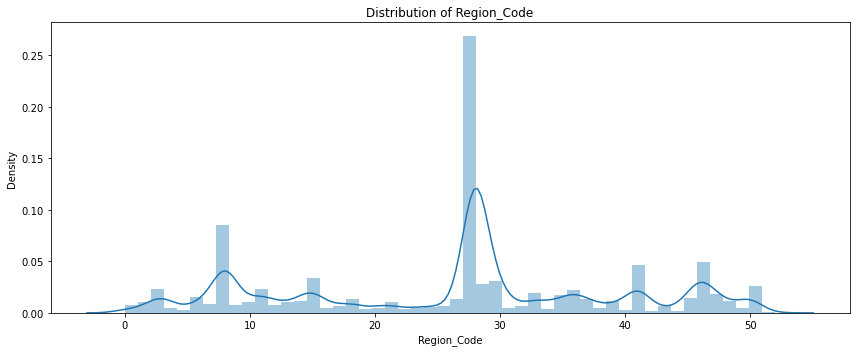

count    381109.000000
mean          0.458210
std           0.498251
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Previously_Insured, dtype: float64


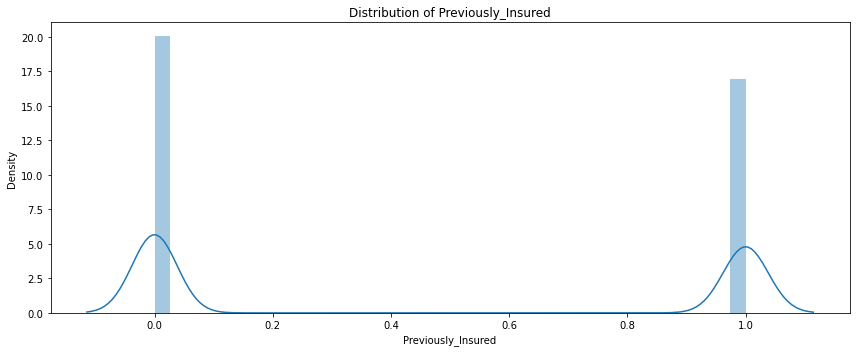

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64


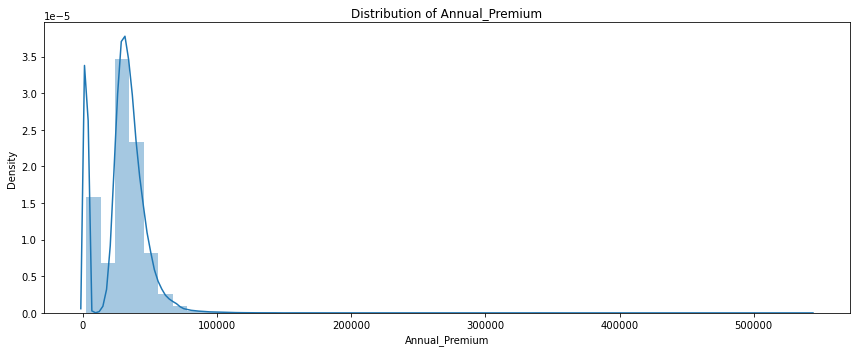

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64


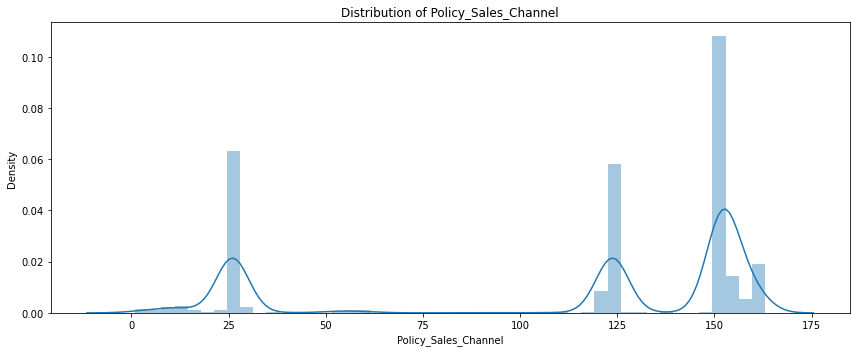

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64


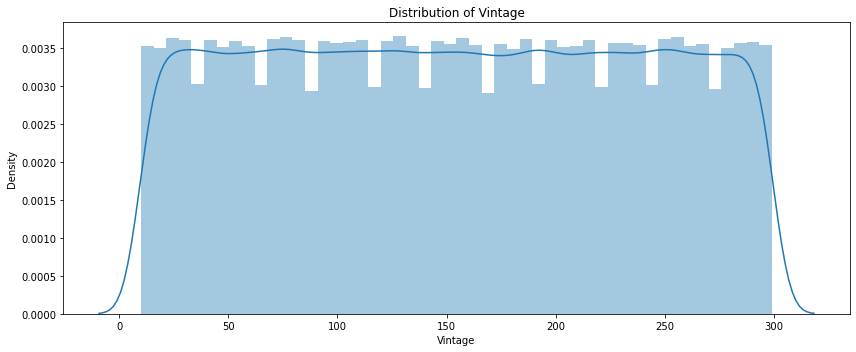

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64


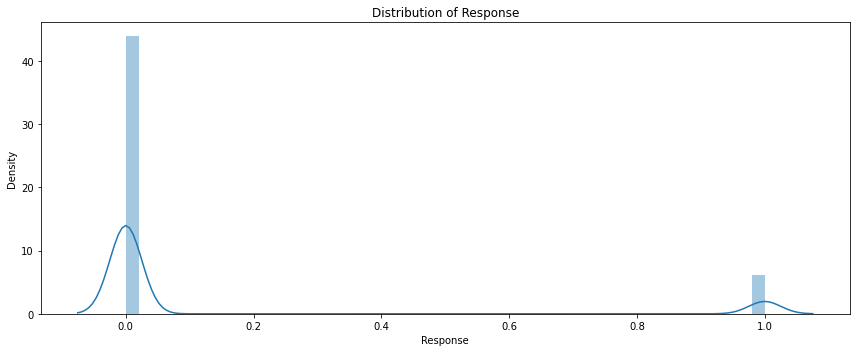

In [16]:
def numeric_distribution_plot(health_train):
    """
    Description : Gives distribution plot for all the numeric features in the dataframe passed
    Argument : Dataframe
    """
    for col in health_train.columns:
        if health_train[col].dtype != 'object':
            print(health_train[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(health_train[col].dropna())
            plt.tight_layout()
            plt.show()
numeric_distribution_plot(health_train)

#### Performing Multivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

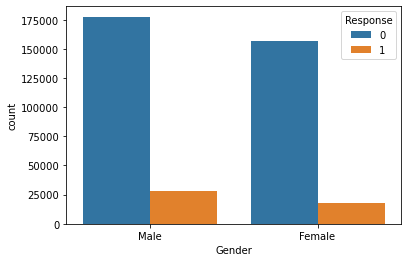

In [17]:
# Checking the relationship between Response and Gender

sns.countplot(data=health_train,x='Gender',hue='Response')

So we have more response from male, than females.

<AxesSubplot:xlabel='Gender', ylabel='count'>

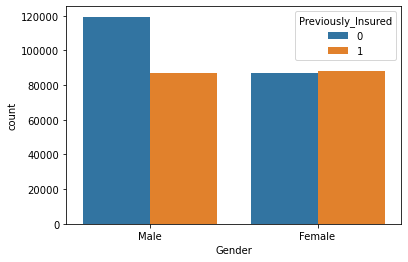

In [18]:
# Checking relationship between Previously Insured and Gender

sns.countplot(data=health_train,x='Gender',hue='Previously_Insured')

More females have previously insured compare to males.

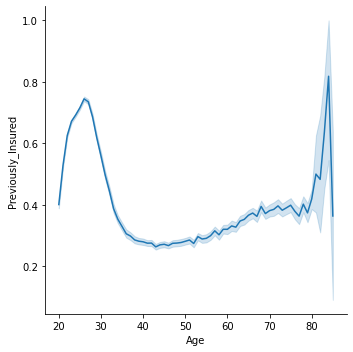

In [19]:
# Looking out for the Ages of people that have previously insured.

sns.relplot(data=health_train,x='Age',y='Previously_Insured', kind='line')

<AxesSubplot:xlabel='Response', ylabel='count'>

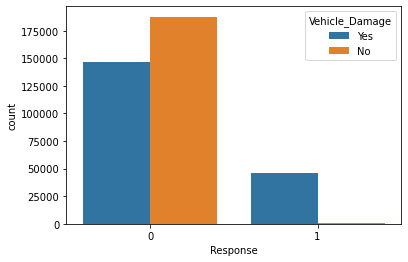

In [20]:
# Looking at the relationship between Response and Vehicle_Damage

sns.countplot(data=health_train,x='Response',hue='Vehicle_Damage')

With this we see that adults mostly apply for this insurance

<AxesSubplot:xlabel='Response', ylabel='count'>

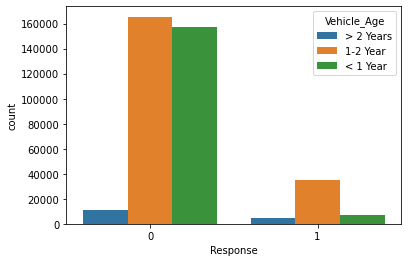

In [21]:
# Looking at the plot of Response to Vehicle_Age also.

sns.countplot(data=health_train,x='Response',hue='Vehicle_Age')

## Data Cleaning

### Checking for outliers

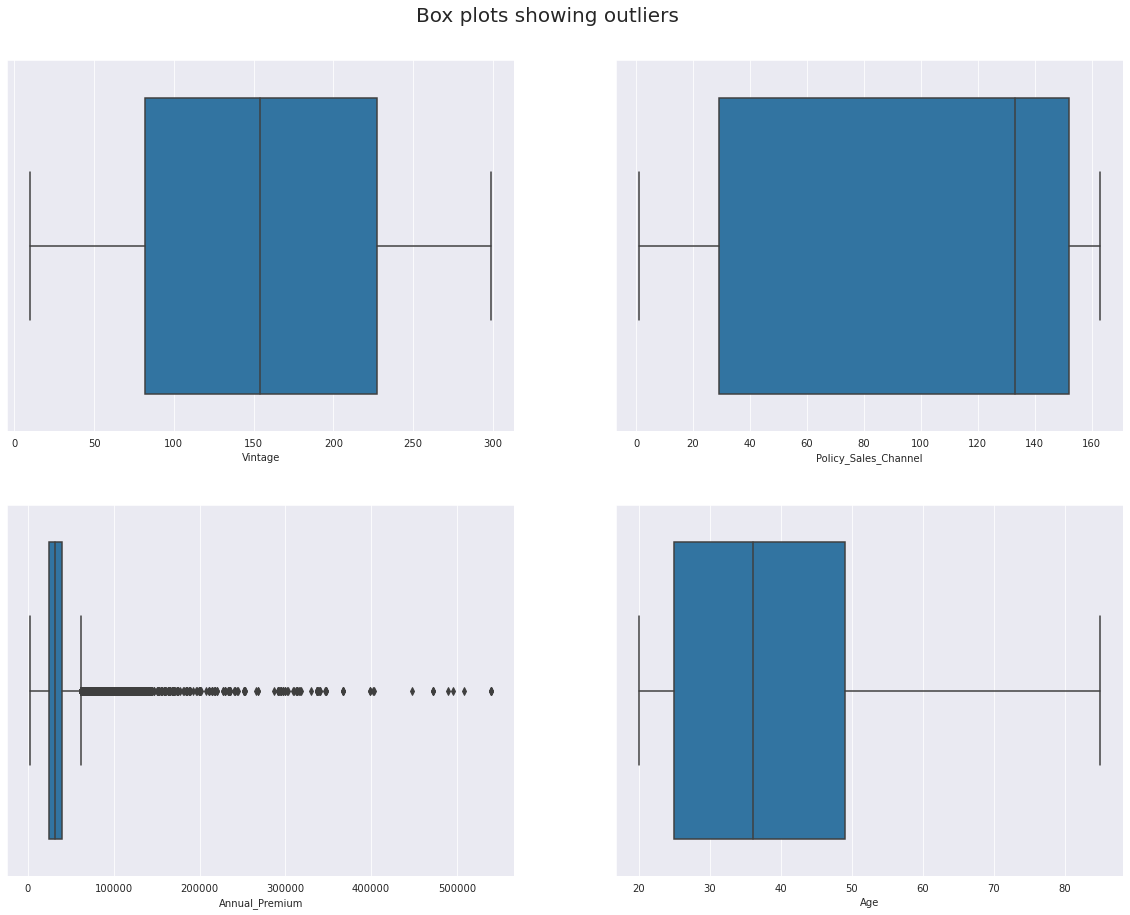

In [22]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 20)

for ax, data, name in zip(axes.flatten(), health_train, ["Vintage", "Policy_Sales_Channel", "Annual_Premium", "Age"]):
  sns.boxplot(health_train[name], ax = ax)

<AxesSubplot:>

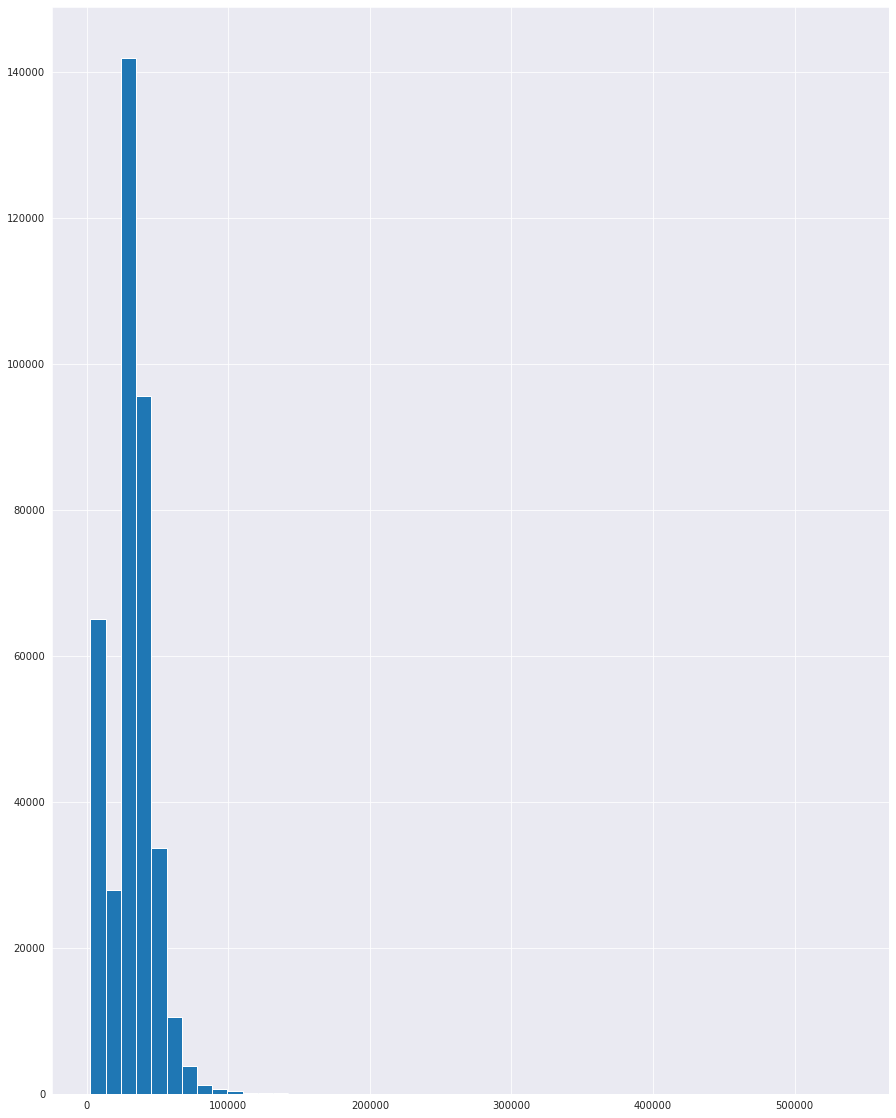

In [23]:
# Annual Premium is pretty bad, it has lots of outliers.
# Plotting an histogram for it.
health_train['Annual_Premium'].hist(figsize=(15, 20), bins=50)

In [24]:
# Checking it's description again.
health_train['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

Again is skewed and has lots of ouliers, needs to be fixed.

Removing the outliers in Annual_Premium by using the quantile ratio.

In [25]:
# Selecting the quantile in the range of 4% to 96%. 

min_threshold_1, max_threshold_1 = health_train['Annual_Premium'].quantile([0.04, 0.96])
min_threshold_1, max_threshold_1

(2630.0, 57564.67999999999)

In [26]:
# Now selecting the datapoints that falls within this range in the dataset.

health_train_1 = health_train[(health_train.Annual_Premium >min_threshold_1) & (health_train.Annual_Premium  < max_threshold_1)]

In [27]:
# looking at the shape of the remaining dataset.

health_train_1.shape

(300987, 12)

PLotting the boxplots again to see if there is still outliers in the dataset.

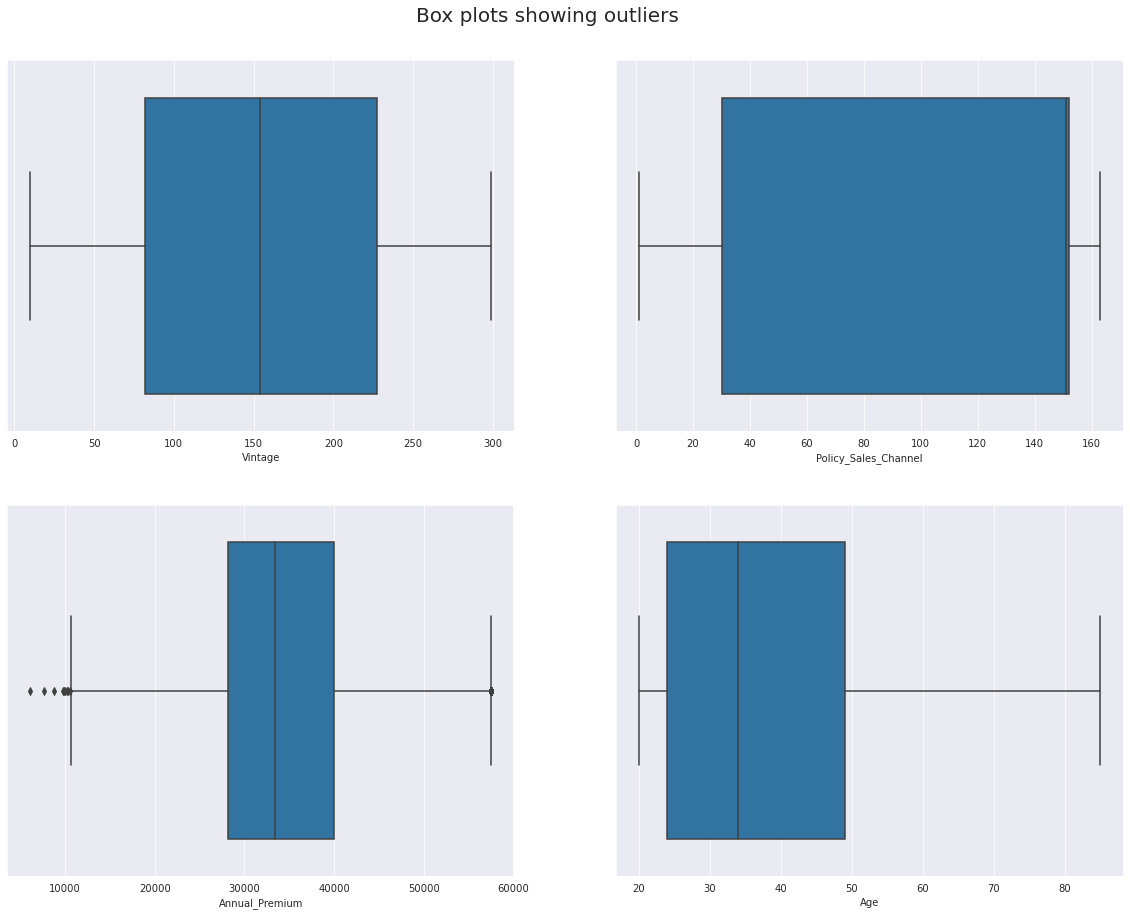

In [28]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 20)

for ax, data, name in zip(axes.flatten(), health_train_1, ["Vintage", "Policy_Sales_Channel", "Annual_Premium", "Age"]):
  sns.boxplot(health_train_1[name], ax = ax)

This looks good.

Checking the plot for Annual_premium again.

<AxesSubplot:>

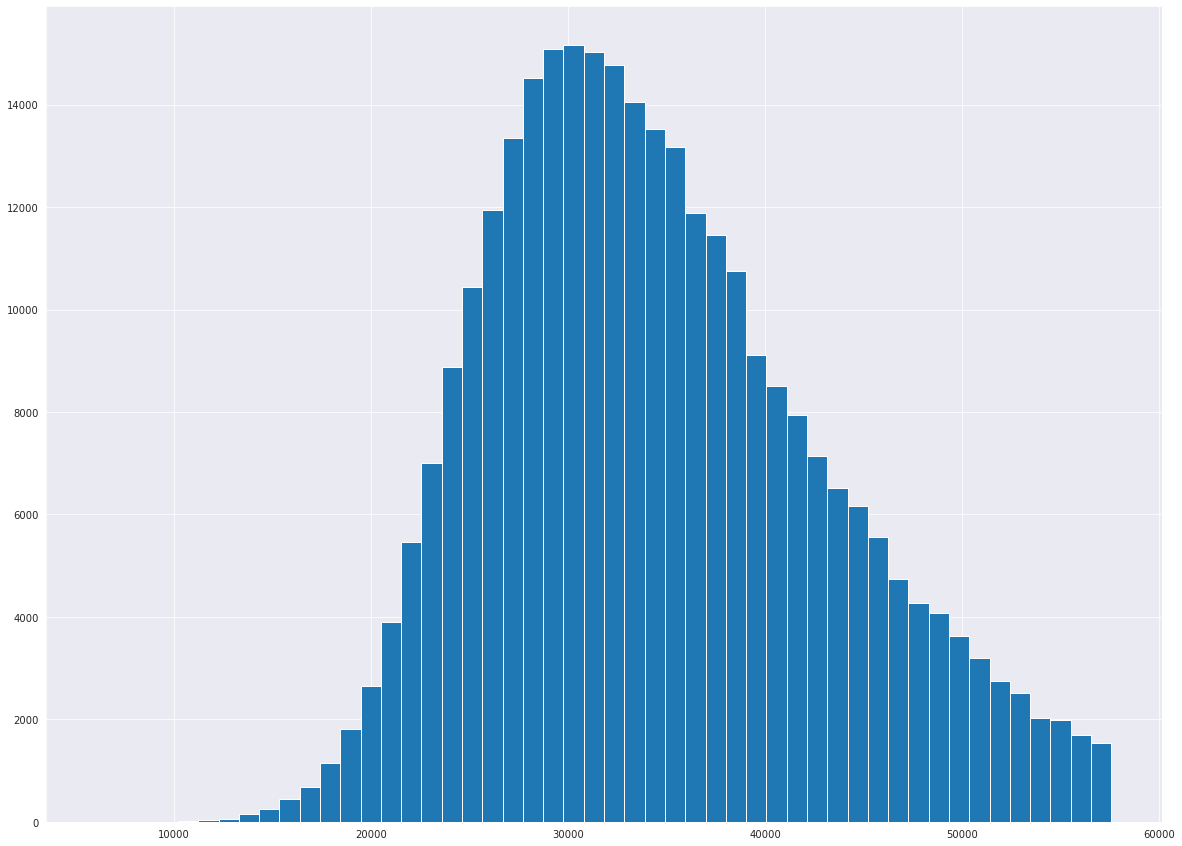

In [29]:
# Plotting it again.

health_train_1['Annual_Premium'].hist(figsize=(20, 15), bins=50)

Now we can work with this, it is no longer skewed.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Driving_License'}>],
       [<AxesSubplot:title={'center':'Region_Code'}>,
        <AxesSubplot:title={'center':'Previously_Insured'}>,
        <AxesSubplot:title={'center':'Annual_Premium'}>],
       [<AxesSubplot:title={'center':'Policy_Sales_Channel'}>,
        <AxesSubplot:title={'center':'Vintage'}>,
        <AxesSubplot:title={'center':'Response'}>]], dtype=object)

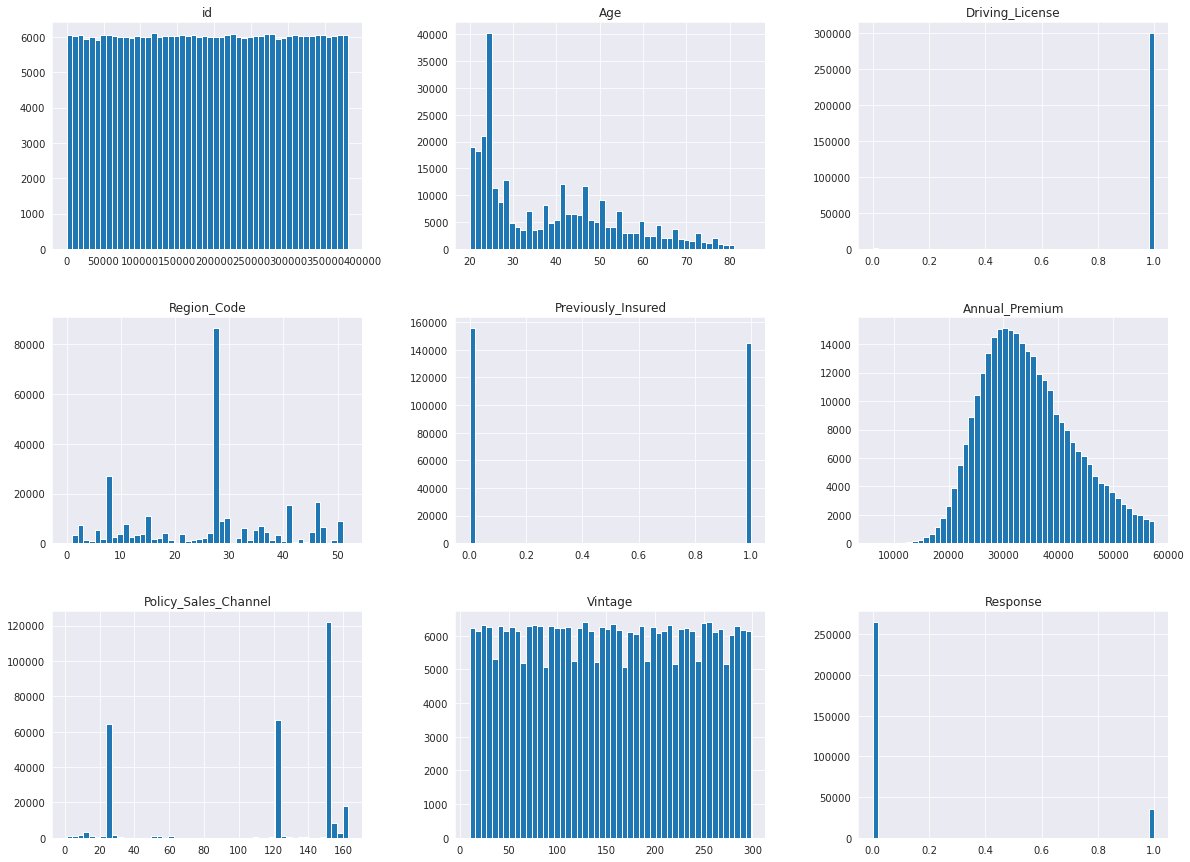

In [30]:
# Plotting the whole dataset to have an overview of how they look.

health_train_1.hist(figsize=(20, 15), bins=50)

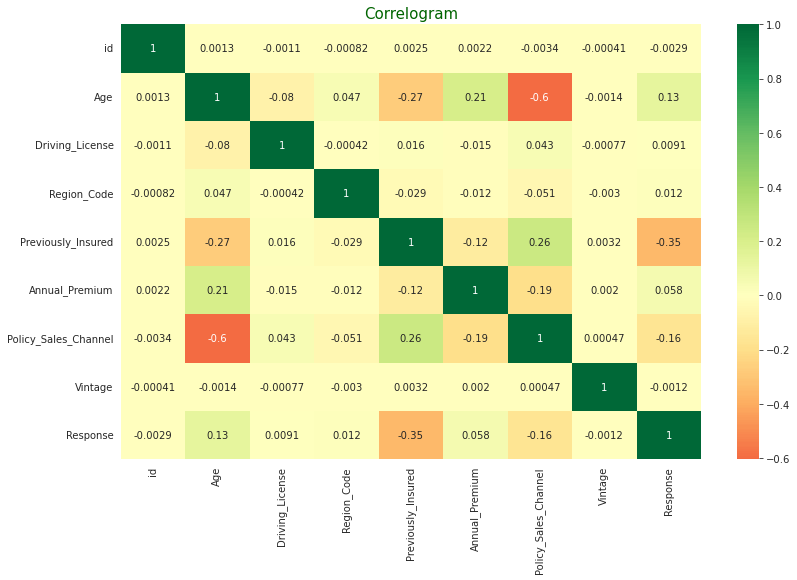

In [31]:
# Lookig at the correlation of each columns 

# Quantify correlations
corr = health_train_1.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [32]:
# Looking at their correlation again.

health_corr=health_train_1.corr()
health_corr['Response'].sort_values(ascending=False)

Response                1.000000
Age                     0.125045
Annual_Premium          0.058259
Region_Code             0.011812
Driving_License         0.009136
Vintage                -0.001234
id                     -0.002889
Policy_Sales_Channel   -0.161982
Previously_Insured     -0.352340
Name: Response, dtype: float64

### Data Preprocessing

Here we can see that, Id, policy_sales_channel and Previously Insured aren't correlating with the response .

So we can remove them.


In [33]:
# Removing Preeviously_Insured and Policy_Sales_channel

health_train_1 = health_train_1.drop(['Previously_Insured', 'Policy_Sales_Channel'], axis=1)

In [34]:
# Removing them from the test set also

health_test = health_test.drop(['Previously_Insured', 'Policy_Sales_Channel'], axis=1)

In [35]:
# Setting our target variable which is the response in this case

health_label = health_train_1['Response']
health_train_2 = health_train_1.drop('Response', axis=1)

Everything seems good.
We can proceed to the next phase.

#### Creating a validation set.

In [36]:
# Creating a validation dataset, to validate our model.

from sklearn.model_selection import train_test_split
health_train_3, health_validation  = train_test_split(health_train_2, test_size=0.2, random_state=10) 
health_train_label, health_validation_label = train_test_split(health_label, test_size=0.2, random_state=10)

Checking the shapes of the train and validation set.

In [37]:
health_train_3.shape

(240789, 9)

In [38]:
health_train_label.shape

(240789,)

In [39]:
health_validation.shape

(60198, 9)

In [40]:
health_validation_label.shape

(60198,)

In [41]:
# Appending columns that are fit for numerical operation and classification operations.
# Appending them to a list.

num_column = []
cat_column = []
for column in health_train_3.columns:
    if health_train_3[column].dtype != "object":
        num_column.append(column)
    else:
        cat_column.append(column)
print(cat_column)
print(num_column)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']
['id', 'Age', 'Driving_License', 'Region_Code', 'Annual_Premium', 'Vintage']


In [42]:
# Creating a dataframe and converting it to a list so they can work in the pipeline effectively.

train_data_num = list(health_train_3[num_column])
train_data_object = list(health_train_3[cat_column])

### Processing the features of the dataset.

The StandardScaler function does the process of Normalizing the Data.

OneHotEncoding does categorization for the categorical features in the dataset.

The data will be fitted in the pipelines so as to apply StandardScaler and OneHotEncoding.

The output of the data from the pipeline is going to be be an array. 

The array is then fitted to the Models.

In [ ]:
# Creating a pipeline.
# One for numerical Operations and the other for categorical operations.
# StandardScaler is used to make the datapoints have a general range. This makes model algorithm works better.
# OneHotEncoding has to do with a general way of encoding the categories in the best way for the model.
# And that is to make each category a column in the dataset, the give each an encoding of 
# 0 and 1. 0 when it isn't of that category and 1 if it is.


num_pipeline = Pipeline([
    ("Standard scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [44]:
# Combining the two pipelines so they can work on a dataset generally.

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, train_data_num),
    ("objects", OneHotEncoder(), train_data_object),
])

In [45]:
# Fitting the train set to the pipeline.

health_train_prepared = full_pipeline.fit_transform(health_train_3)

In [46]:
# Transforming the validation set also.

health_validation_prepared = full_pipeline.transform(health_validation)

In [47]:
# Then transforming the test set.

health_test_prepared = full_pipeline.transform(health_test)

## Modelling

Performance Measure for this Classification task is ROC_AUC_Score. We will be implementing it alongside with the Accuracy measure.

Now we will be implementing some Models that works for classification tasks.

### RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

forest_clf = RandomForestClassifier(random_state = 10)
forest_clf.fit(health_train_prepared, health_train_label)
health_pred = forest_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = forest_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

Accuracy  0.8749626233429683
Roc_AUC_Score  0.8371699103091403


### DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier as dtc

tree_clf = dtc(max_depth=10)
tree_clf.fit(health_train_prepared, health_train_label)
health_pred = tree_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = tree_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

Accuracy  0.8793149274062261
Roc_AUC_Score  0.8452719145713353


### XGBoostClassifier

In [59]:
import xgboost

from xgboost.sklearn import XGBClassifier
xgboost_clf = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgboost_clf.fit(health_train_prepared, health_train_label)
health_pred = xgboost_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = xgboost_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

Accuracy  0.8806272633642314
Roc_AUC_Score  0.85015514657063


### LGBMClassifier

In [60]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(health_train_prepared, health_train_label)
health_pred = lgb_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = lgb_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

Accuracy  0.8810259477059038
Roc_AUC_Score  0.8536414883600165


### GradientBoostingClassifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(health_train_prepared, health_train_label)
health_pred = gbc_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = gbc_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

Accuracy  0.8810591714010432
Roc_AUC_Score  0.853314628935259


So with the result we have now, we can choose any of the classifier model as our main Model.

And looking at it GradientBoostingClasifier has a high accuracy and the highest ROC_AUC_Score

In [62]:
test_pred = gbc_clf.predict(health_test_prepared)

In [63]:
test_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [64]:
# Now creating a dataframe that have the response prediction and the id. Our Submission.

test_response = pd.DataFrame()
test_response['id'] = health_test.id
test_response['Predicted Response'] = test_pred

In [65]:
test_response

,id,Predicted Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


This submission dataset can be exported, then submitted.

In [61]:
# The following code will do that 


# test_response.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)